## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation

## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [2]:
#!pip install wget
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
#!tar xf spark-2.4.0-bin-hadoop2.7.tgz
#!pip install -q findspark
import os,wget
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

 20% [...............                                                           ] 1433600 / 7048394

 47% [..................................                                        ] 3317760 / 7048394

 76% [........................................................                  ] 5398528 / 7048394

100% [..........................................................................] 7048394 / 7048394

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.functions import mean, min, max

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [7]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

#A SQLContext can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files
sqlContext=SQLContext(spark)
#Returns a DataFrameReader that can be used to read data in as a DataFrame.
df = sqlContext.read.csv("2020T2Data.csv", header=True)
df.show(5)
df.printSchema()


+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [8]:
from pyspark.sql import functions as F
from pyspark.sql.functions import mean, min, max

#From Stackoverflow
age_stats = df.select([min("Age"),F.round(mean("Age")),max("Age")])
age_stats.show()

+--------+------------------+--------+
|min(Age)|round(avg(Age), 0)|max(Age)|
+--------+------------------+--------+
|      16|              25.0|      45|
+--------+------------------+--------+



In [9]:
df

DataFrame[ID: string, Name: string, Age: string, Photo: string, Nationality: string, Flag: string, Overall: string, Potential: string, Club: string, Club Logo: string, value(M): string, wage(K): string, Special: string, Preferred Foot: string, International Reputation: string, Weak Foot: string, Skill Moves: string, Work Rate: string, Body Type: string, Real Face: string, Position: string, Jersey Number: string, Joined: string, Loaned From: string, Contract Valid Until: string, Height: string, Height(CM): string, Weight: string, Weight(KG): string, Crossing: string, Finishing: string, HeadingAccuracy: string, ShortPassing: string, Volleys: string, Dribbling: string, Curve: string, FKAccuracy: string, LongPassing: string, BallControl: string, Acceleration: string, SprintSpeed: string, Agility: string, Reactions: string, Balance: string, ShotPower: string, Jumping: string, Stamina: string, Strength: string, LongShots: string, Aggression: string, Interceptions: string, Positioning: string

In [0]:
#statistics on Overall
overall_stats = df.select([min("overall"),F.round(mean("overall")),max("overall")])
overall_stats.show()

+------------+----------------------+------------+
|min(overall)|round(avg(overall), 0)|max(overall)|
+------------+----------------------+------------+
|          46|                  66.0|          94|
+------------+----------------------+------------+



In [0]:
#Position having highest Avg Overall  

pos_max_overall = df.groupBy(['Position']).agg({'Overall' : 'AVG'}).sort("AVG(Overall)",ascending=False)
max_overall_pos = pos_max_overall.limit(1).toPandas()
print("{} has maximmum average Overall of {}".
      format((max_overall_pos.iloc[0,0]),round(max_overall_pos.iloc[0,1],2)))
pos_max_overall.show()

LF has maximmum average Overall of 73.87
+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
|      RF|            73.25|
|     RAM|72.28571428571429|
|     LAM|71.85714285714286|
|      LS|70.06280193236715|
|     RDM|69.75403225806451|
|      RS|69.52216748768473|
|     RCB|69.28398791540785|
|     LCM|69.27088607594936|
|     LCB|69.24074074074075|
|     RCM|  69.076726342711|
|     LDM|69.03292181069959|
|      RW|66.92972972972973|
|     CAM|66.90396659707724|
|      LM|66.69223744292238|
|      LW|66.61679790026247|
|     LWB|66.51282051282051|
|      RM|66.49644128113879|
|     CDM| 66.3132911392405|
|      RB|66.05886909372579|
+--------+-----------------+
only showing top 20 rows



In [0]:
#Your Code to output top 3 countries with highest Avg Overall
print("Top 3 countries with highest Avg Overall are:")
df.groupBy(['Nationality']).agg({'Overall' : 'AVG'}).sort("AVG(Overall)", ascending = False).show(3)

Top 3 countries with highest Avg Overall are:
+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [10]:
#Your code for the results on Avg Potentials on Country by Position with ordering the results on country by alphabet (show top 10)
nat_pos_pot = df.groupBy('Nationality').pivot('Position').agg({'Potential' : 'AVG'}).sort('Nationality')
nat_pos_pot.show(10)

print("Position with highest Avg Potential for Australia is:")
#Your Code to identify the position having highest Avg Potential for Australia
aus_tal=df.filter(df['Nationality']=="Australia").groupBy(['Position']).agg({'Potential':'AVG'}).sort("AVG(Potential)",ascending=False).show(1)
aus_tal

+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

In [11]:
#Creating a separate dataframe to plot potential and overall w.r.t. age
age_pot_over=df.groupBy('Age').agg({'Potential' : 'AVG','Overall' : 'AVG'}).sort('Age').toPandas()
age_pot_over['Released_pot'] = np.where((age_pot_over['avg(Overall)'] == age_pot_over['avg(Potential)']), 1, 0)

Text(0.5, 1.0, 'Avg vs Overall and Potential')

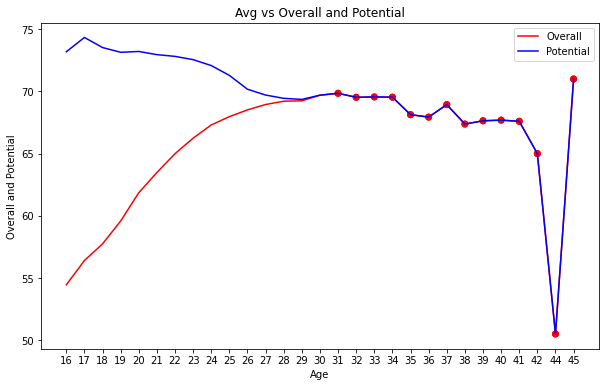

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 6))
col=np.where(age_pot_over['Released_pot']<1,'w',np.where(age_pot_over['Released_pot']>1,'b','r'))
ax.plot(age_pot_over['Age'], age_pot_over['avg(Overall)'], color = 'red')
ax.plot(age_pot_over['Age'], age_pot_over['avg(Potential)'], color = 'blue')
ax.scatter(age_pot_over['Age'], age_pot_over['avg(Overall)'], color = col)
ax.scatter(age_pot_over['Age'], age_pot_over['avg(Potential)'], color = col)
ax.legend(['Overall','Potential'])
ax.set_xlabel("Age")
ax.set_ylabel("Overall and Potential")
ax.set_title("Avg vs Overall and Potential")

## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [12]:
# Your code to select relevant features and filter the data by removing the GK
kmeans_data = df.filter(df['Position'] != 'GK')
kmeans_data = kmeans_data.select('ID','Position','Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy',
                                 'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                                 'LongPassing','BallControl','Acceleration','SprintSpeed',
                                 'Agility','Reactions','Balance','ShotPower','Jumping','Stamina',
                                 'Strength','LongShots','Aggression','Interceptions',
                                 'Positioning','Vision','Penalties','Composure','Marking',
                                 'StandingTackle','SlidingTackle')

kmeans_data.show()


+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [14]:
from pyspark.sql.functions import when,col
from pyspark.sql.functions import udf
# Your code to complete
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD = ['RF','LF','LW','RS','RW','LS','CF','ST']
MID = ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
df_kmeans_new=kmeans_data.withColumn('Position_Group', when(kmeans_data['Position'].isin(DEF), 'DEF')\
.when(kmeans_data['Position'].isin(FWD), 'FWD')\
.when(kmeans_data['Position'].isin(MID), 'MID'))
df_kmeans_new.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [15]:
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType


FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
#From https://rsandstroem.github.io/sparkkmeans.html -converting columns type to Double as required by vector assembler
df_kmeans_ = df_kmeans_new.select('ID', *(col(c).cast(DoubleType()).alias(c) for c in FEATURES_COL))

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [26]:
cost = np.zeros(20)

#From https://rsandstroem.github.io/sparkkmeans.html
from pyspark.ml.evaluation import ClusteringEvaluator
for k in range(2,20):
  kmeans_01 = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  kmeans_model_01 = kmeans_01.fit(df_kmeans_.sample(False,0.2, seed=1))
  #cost[k] = kmeans_model_01.computeCost(df_kmeans_)

In [ ]:
kmeans_model_01

In [25]:
evaluator = ClusteringEvaluator()

Text(0.5, 1.0, 'Cost vs K clusters')

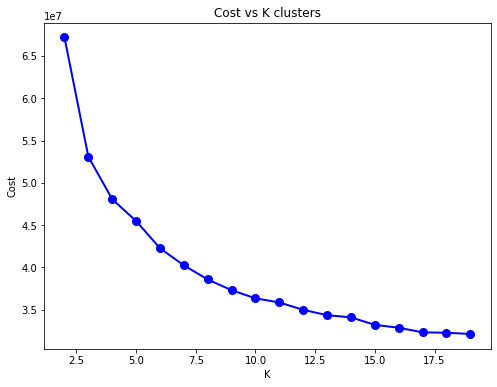

In [0]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20],'bo-', linewidth = 2, markersize = 8)
ax.set_xlabel('K')
ax.set_ylabel('Cost')
ax.set_title('Cost vs K clusters')


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
k = 8

#Fitting kmeans model
kmeans_02 = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
kmeans_model_02 = kmeans_02.fit(df_kmeans_)

#Predicting fitted model
predicted_kmeans = kmeans_model_02.transform(df_kmeans_).select('ID','prediction')

#Appending cluster number in original df_kmeans_new dataframe based on ID
df_kmeans_new = df_kmeans_new.join(predicted_kmeans, ['ID'])
pd_kmeans_new=df_kmeans_new.toPandas()


In [0]:
#Position group cluster wise count
df_kmeans_new.groupby("Position_Group").pivot('prediction').count().show()

+--------------+----+----+----+----+----+----+----+----+
|Position_Group|   0|   1|   2|   3|   4|   5|   6|   7|
+--------------+----+----+----+----+----+----+----+----+
|           MID| 967| 117|1195|  77|1720|1486| 135|1141|
|           DEF|1230|1462|   4|1266| 599|   8|null|1297|
|           FWD|  11|   2|1112|   1|  71| 535|1648|  38|
+--------------+----+----+----+----+----+----+----+----+



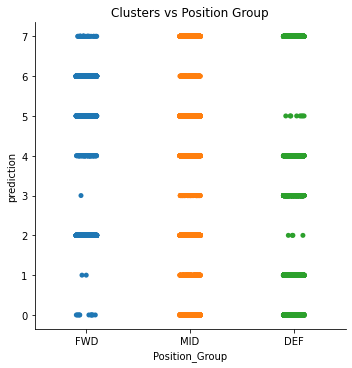

In [0]:
#Cluster vs Position group displaying imbalance clusters
sns.catplot(x='Position_Group',y='prediction',data=pd_kmeans_new).set(title='Clusters vs Position Group');

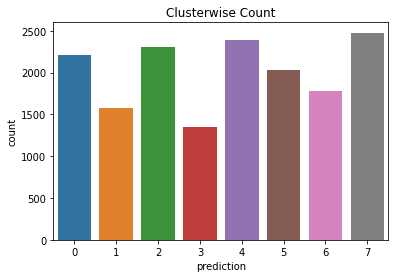

In [0]:
#Cluster wise frequency plot
sns.countplot(x='prediction',data=pd_kmeans_new).set(title='Clusterwise Count');

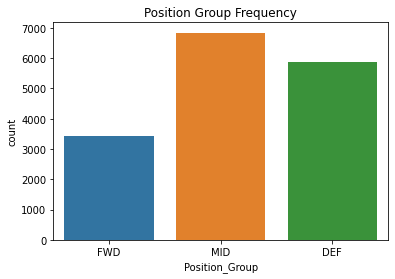

In [0]:
#Chechking balance in Position Group
sns.countplot(x='Position_Group',data=pd_kmeans_new).set(title='Position Group Frequency');

In [0]:
from pyspark.sql import SQLContext

#Getting centers of 8 clusters
centers = kmeans_model_02.clusterCenters()

#Printing 31 centroids corresponding to 31 variables for each cluster
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]
[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]
[172.46617578  73.21508518  65.18944637  68.70069204  57.79541522
  69.00043253  64.56055363  73.22923875  67.01859862  61.3399654
  60.86245675  72.86548443  76.2

In [0]:
#Creating dataram of Cluster means
center_array = np.array(centers)
df_centers = pd.DataFrame(center_array, columns = FEATURES_COL)
df_centers['Clusters']=[1,2,3,4,5,6,7,8]
df_centers

,Height(CM),Weight(KG),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Clusters
0,177.331746,76.317945,58.416399,44.020614,62.791113,67.322034,42.538708,61.026111,52.179111,46.792945,63.551077,65.575813,65.252405,66.065964,64.627577,66.205680,64.105818,62.282639,70.520385,73.826386,72.673843,52.596885,71.434265,67.650481,53.270728,57.474576,48.979386,64.576271,66.671553,68.964727,66.889143,1
1,187.680263,81.706809,39.868438,30.212524,68.726755,59.716003,31.193548,44.543327,34.724858,33.426312,54.991145,55.461101,53.194813,55.605946,50.158760,62.979760,50.611638,51.142315,68.349779,64.290955,79.529412,34.243517,70.567995,67.063884,33.600253,41.735610,41.055661,61.129032,67.294118,69.611638,66.765338,2
2,172.466176,73.215085,65.189446,68.700692,57.795415,69.000433,64.560554,73.229239,67.018599,61.339965,60.862457,72.865484,76.230969,75.484429,76.858564,68.820934,73.341696,71.578720,66.421713,69.089533,63.619377,67.487889,56.358564,35.852509,70.454585,67.553633,65.270329,68.708045,36.981401,34.274654,30.684256,3
3,179.480395,76.008290,36.060831,24.841246,55.700297,47.258160,27.141691,39.071217,29.752967,28.676558,39.298961,45.006677,60.318991,60.531899,53.302671,53.134273,59.041543,38.190653,67.600890,60.880564,67.212166,25.610534,57.082344,56.229228,31.920623,34.706973,36.516320,47.675074,57.191395,60.847181,58.898368,4
4,171.831220,73.636652,67.455707,58.569015,58.093943,72.504326,57.661310,70.060981,66.779975,62.422332,69.034611,72.122373,69.906881,69.056448,71.967450,69.543469,71.484137,70.778327,67.386485,75.372064,67.246395,66.293778,68.817058,66.052740,65.211372,68.499382,59.716934,69.017717,63.461475,66.484137,63.407911,5
5,170.910165,69.059326,55.292346,55.095802,43.159012,60.047407,48.400494,64.168889,52.723951,46.470617,53.466667,62.815802,74.158025,73.067654,72.882963,54.819753,74.182222,58.154074,57.084938,59.055309,50.880000,51.040988,42.448889,30.003951,56.255802,56.670123,52.631111,55.064691,35.403457,33.610864,32.670617,6
6,179.044056,77.273769,41.525366,64.628523,62.523675,54.670800,54.124014,60.157272,45.931793,38.348929,40.625141,61.228861,67.103720,68.447576,63.393461,58.988162,61.213641,63.873732,66.865840,62.502818,69.780158,56.900789,48.685457,22.344419,62.615558,51.563134,61.207441,56.670800,27.092446,21.864149,19.754791,7
7,170.423643,71.651205,54.409790,39.528722,51.076052,60.990291,37.064320,58.461974,45.364078,40.249595,55.511731,59.909790,69.559871,69.156553,67.275485,58.088592,69.606796,50.264563,64.686084,67.796521,60.887540,42.326861,59.254450,56.585761,50.674353,51.526294,43.852346,53.676780,56.214806,59.438916,57.930825,8


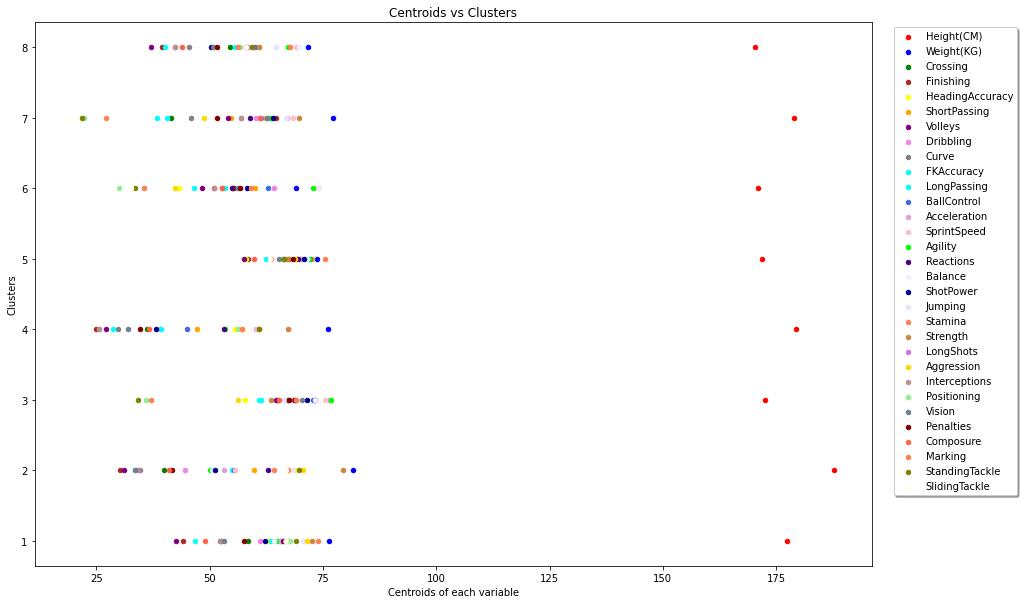

In [0]:
#Plotting cetroids of each column w.r.t. clusters

plt.figure(figsize = (15,10))
ax = plt.gca()
df_centers.plot(kind='scatter',x='Height(CM)',y='Clusters',color='red',ax=ax)
df_centers.plot(kind='scatter',x='Weight(KG)',y='Clusters',color='blue',ax=ax)
df_centers.plot(kind='scatter',x='Crossing',y='Clusters',color='green',ax=ax)
df_centers.plot(kind='scatter',x='Finishing',y='Clusters',color='brown',ax=ax)
df_centers.plot(kind='scatter',x='HeadingAccuracy',y='Clusters',color='yellow',ax=ax)
df_centers.plot(kind='scatter',x='ShortPassing',y='Clusters',color='orange',ax=ax)
df_centers.plot(kind='scatter',x='Volleys',y='Clusters',color='purple',ax=ax)
df_centers.plot(kind='scatter',x='Dribbling',y='Clusters',color='violet',ax=ax)
df_centers.plot(kind='scatter',x='Curve',y='Clusters',color='gray',ax=ax)
df_centers.plot(kind='scatter',x='FKAccuracy',y='Clusters',color='cyan',ax=ax)
df_centers.plot(kind='scatter',x='LongPassing',y='Clusters',color='aqua',ax=ax)
df_centers.plot(kind='scatter',x='BallControl',y='Clusters',color='royalblue',ax=ax)
df_centers.plot(kind='scatter',x='Acceleration',y='Clusters',color='plum',ax=ax)
df_centers.plot(kind='scatter',x='SprintSpeed',y='Clusters',color='pink',ax=ax)
df_centers.plot(kind='scatter',x='Agility',y='Clusters',color='lime',ax=ax)
df_centers.plot(kind='scatter',x='Reactions',y='Clusters',color='indigo',ax=ax)
df_centers.plot(kind='scatter',x='Balance',y='Clusters',color='#eeefff',ax=ax)
df_centers.plot(kind='scatter',x='ShotPower',y='Clusters',color='darkblue',ax=ax)
df_centers.plot(kind='scatter',x='Jumping',y='Clusters',color='lavender',ax=ax)
df_centers.plot(kind='scatter',x='Stamina',y='Clusters',color='coral',ax=ax)
df_centers.plot(kind='scatter',x='Strength',y='Clusters',color='peru',ax=ax)
df_centers.plot(kind='scatter',x='LongShots',y='Clusters',color='orchid',ax=ax)
df_centers.plot(kind='scatter',x='Aggression',y='Clusters',color='gold',ax=ax)
df_centers.plot(kind='scatter',x='LongShots',y='Clusters',color='rosybrown',ax=ax)
df_centers.plot(kind='scatter',x='Interceptions',y='Clusters',color='lightgreen',ax=ax)
df_centers.plot(kind='scatter',x='Positioning',y='Clusters',color='slategray',ax=ax)
df_centers.plot(kind='scatter',x='Vision',y='Clusters',color='maroon',ax=ax)
df_centers.plot(kind='scatter',x='Penalties',y='Clusters',color='tomato',ax=ax)
df_centers.plot(kind='scatter',x='Marking',y='Clusters',color='coral',ax=ax)
df_centers.plot(kind='scatter',x='StandingTackle',y='Clusters',color='olive',ax=ax)
df_centers.plot(kind='scatter',x='SlidingTackle',y='Clusters',color='ivory',ax=ax)
plt.title("Centroids vs Clusters")
plt.xlabel("Centroids of each variable")
ax.legend(FEATURES_COL,loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.show()

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [12]:
#Calling kmeans data for quick reference
df_kmeans_new.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+----------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|prediction|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------

In [0]:
# Dropping position and features column
df_kmeans_pred_ = df_kmeans_new.drop('features').drop('position')

# Renaming prediction column to CLuster
df_kmeans_pred_ = df_kmeans_pred_.withColumnRenamed("prediction","Cluster")

In [14]:
# Creating list for desirable skillset
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']

df_kmeans_pred_ = df_kmeans_pred_.select('Position_Group',*(col(c).cast(DoubleType()).alias(c) for c in FEATURES_COL_))
df_kmeans_pred_

# Creating Features and adding it to the dataframe "df_class_" with Position_Group 
vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')

# Using show() method to display df_class_ dataframe
df_class_.show(3)


+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [15]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

In [17]:
raw_data_.show()

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[173.736,72.12112...|           FWD|[12.9261363965246...|     0|
|[188.976,83.00733...|           FWD|[14.0600080102548...|     0|
|[179.832,68.0388,...|           FWD|[13.3796850420167...|     0|
|[155.7528,69.8531...|           MID|[11.5881678923229...|     2|
|[176.784,73.93549...|           FWD|[13.1529107192706...|     0|
|[176.784,66.22443...|           MID|[13.1529107192706...|     2|
|[182.88,86.18248,...|           FWD|[13.6064593647627...|     0|
|[182.88,82.100152...|           DEF|[13.6064593647627...|     1|
|[182.88,79.832192...|           FWD|[13.6064593647627...|     0|
|[182.88,76.203456...|           MID|[13.6064593647627...|     2|
|[188.976,78.01782...|           DEF|[14.0600080102548...|     1|
|[176.784,67.13161...|           MID|[13.1529107192706...|     2|
|[170.688,

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
#Creating training and test dataset
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.show(10)

+--------------------+--------------+--------------------+------+--------------------+--------------------+----------+
|            features|Position_Group|     Scaled_features|Target|       rawPrediction|         probability|prediction|
+--------------------+--------------+--------------------+------+--------------------+--------------------+----------+
|[155.448,59.87414...|           MID|[11.5654904600483...|     2|[-0.2750273862955...|[0.04541614403414...|       2.0|
|[155.448,59.87414...|           MID|[11.5654904600483...|     2|[0.06116773353178...|[0.08970103132642...|       2.0|
|[155.448,59.87414...|           FWD|[11.5654904600483...|     0|[1.85185804913847...|[0.44932781049994...|       2.0|
|[155.448,62.14210...|           MID|[11.5654904600483...|     2|[-1.0929623432520...|[0.03191300455918...|       2.0|
|[155.448,62.14210...|           MID|[11.5654904600483...|     2|[-1.3716779465324...|[0.03454095693204...|       2.0|
|[155.448,62.14210...|           MID|[11.5654904


****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

#Summary of test split to check the balance of class
predict_test.groupBy("Target").count().show()
raw_data_.groupBy("Target").count().show()


+------+-----+
|Target|count|
+------+-----+
|     1| 1717|
|     2| 2082|
|     0| 1017|
+------+-----+

+------+-----+
|Target|count|
+------+-----+
|     1| 5866|
|     2| 6838|
|     0| 3418|
+------+-----+



In [0]:
#From stackoverflow - Function to plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

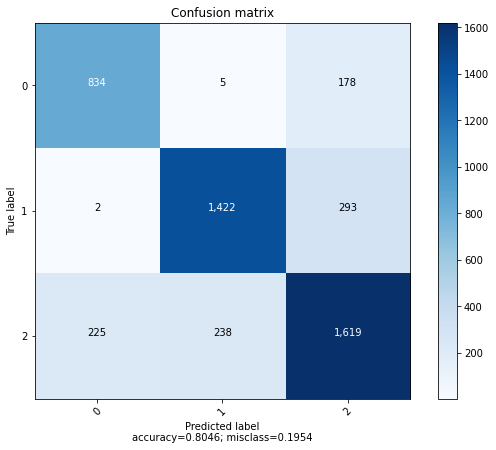

In [0]:
from sklearn.metrics import confusion_matrix
from pyspark.sql.functions import col

#Extracting target and predicted values as list
target=predict_test.select(col("Target")).collect()
prediction=predict_test.select(col("prediction")).collect()

#Plotting confusion matrix
labels=[0,1,2]
cm = confusion_matrix(target, prediction, labels)
plot_confusion_matrix(cm,[0,1,2],normalize=False)

In [0]:
#Printing precision, recall, and F1-score 
from sklearn.metrics import classification_report
class_report = classification_report(target,prediction,labels)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1017
           1       0.85      0.83      0.84      1717
           2       0.77      0.78      0.78      2082

    accuracy                           0.80      4816
   macro avg       0.80      0.81      0.81      4816
weighted avg       0.81      0.80      0.80      4816



### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#####**Naive Bayes Classification**

In [0]:
#Pre-processing training and test data to suit NB algorithm. 
#Pipeline is not used as data transformations are done and only one estimator nb
train_nb = train.withColumn("Target",train["Target"].cast(DoubleType()))
train_nb = train_nb.withColumnRenamed("Target","label")
test_nb = test.withColumn("Target",test["Target"].cast(DoubleType()))
test_nb = test_nb.withColumnRenamed("Target","label")

In [0]:
#Initializing models
nb=NaiveBayes(featuresCol = 'Scaled_features', labelCol = 'label',modelType="multinomial")

#Creating a pipeling for estimator
pp_nb = Pipeline(stages=[nb])

#From https://gist.github.com/colbyford/1f47a90fe0c55b4414cbd0c784fe3a67
# Create ParamGrid for Cross Validation
nbparamGrid = (ParamGridBuilder()\
               .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])\
               .build())

# Evaluate model
nbevaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Create 5-fold CrossValidator
nbcv = CrossValidator(estimator = pp_nb,
                    estimatorParamMaps = nbparamGrid,
                    evaluator = nbevaluator,
                    numFolds = 10)

In [0]:
%%time
# Run cross validations
nbcvModel = nbcv.fit(train_nb)

# Use test set here so we can measure the accuracy of our model on new data
nbpred = nbcvModel.transform(test_nb)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Training Accuracy:',round(sum(nbcvModel.avgMetrics)/len(nbcvModel.avgMetrics),2))
print('Test Accuracy:', round(nbevaluator.evaluate(nbpred),2))

Training Accuracy: 0.76
Test Accuracy: 0.77
CPU times: user 1.51 s, sys: 382 ms, total: 1.89 s
Wall time: 53.9 s


NB Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78      1017
           1       0.81      0.80      0.80      1717
           2       0.74      0.72      0.73      2082

    accuracy                           0.77      4816
   macro avg       0.77      0.78      0.77      4816
weighted avg       0.77      0.77      0.77      4816



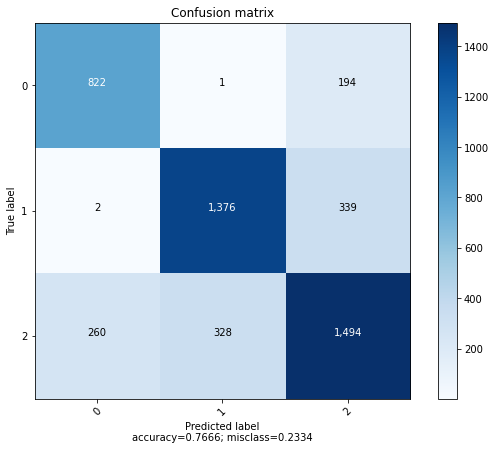

In [0]:
from pyspark.sql.types import IntegerType
#Extracting target and predicted values as list
nb_target=nbpred.select(col("label")).collect()
nb_pred=nbpred.select(col("prediction")).collect()

#Printing precision, recall, and F1-score for Naive Bayes model
nb_class_report = classification_report(nb_target,nb_pred,labels)
print("NB Classification Report:\n", nb_class_report)

#Plotting confusion matrix
labels=[0,1,2]
cm = confusion_matrix(nb_target, nb_pred, labels)
plot_confusion_matrix(cm,[0,1,2],normalize=False)

In [0]:
#Parameters of the model - #From Stackoverflow
print(nbcvModel.avgMetrics)
{param[0].name: param[1] for param in nbcvModel.extractParamMap().items()}

[0.7644450300812525, 0.7644450300812525, 0.7644450300812525, 0.7644450300812525, 0.7644450300812525, 0.7644450300812525]


{'estimator': Pipeline_e5746e86fa94,
 'estimatorParamMaps': [{Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.0},
  {Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.2},
  {Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.4},
  {Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.6},
  {Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.8},
  {Param(parent='NaiveBayes_8fb332799a7c', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 1.0}],
 'evaluator': MulticlassClassificationEvaluator_462e9d7e6db3,
 'seed': -9159999744304748469}

#####**Logistic Regression**

In [0]:
#Preparing data for Logistic regression
train_lr = train
test_lr = test

In [0]:
#Initializaing the model
lr_cv = LogisticRegression(labelCol="Target", featuresCol="Scaled_features")

#Creating a pipeling for estimator
pp_lr_cv = Pipeline(stages=[lr_cv])

#From towardsdatascience
# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
               .addGrid(lr_cv.maxIter, [50,60,70])  #Iterations
               .build())

# Evaluate model
lrevaluator = MulticlassClassificationEvaluator(labelCol="Target", predictionCol="prediction")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = pp_lr_cv,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 20)

In [0]:
%%time
# Run cross validations
lrcvModel = lrcv.fit(train_lr)

# Use test set here so we can measure the accuracy of our model on new data
lrpred = lrcvModel.transform(test_lr)

# Evaluate best model
print('Training Accuracy:',round(sum(lrcvModel.avgMetrics)/len(lrcvModel.avgMetrics),2))
print('Test Accuracy:', round(lrevaluator.evaluate(lrpred),2))

Training Accuracy: 0.86
Test Accuracy: 0.86
CPU times: user 2.94 s, sys: 724 ms, total: 3.67 s
Wall time: 3min 31s


LR CV Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1017
           1       0.91      0.92      0.91      1717
           2       0.84      0.83      0.84      2082

    accuracy                           0.86      4816
   macro avg       0.85      0.85      0.85      4816
weighted avg       0.86      0.86      0.86      4816



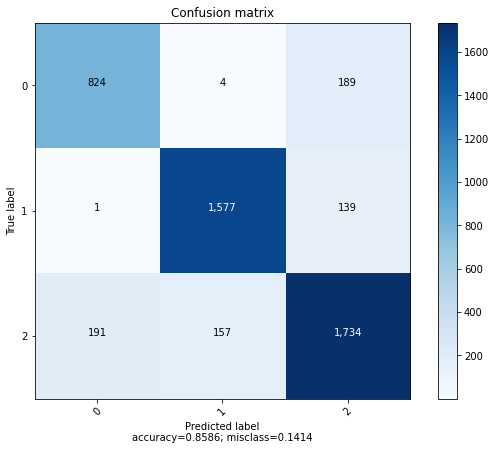

In [0]:
#Extracting target and predicted values as list
lr_target=lrpred.select(col("Target")).collect()
lr_pred=lrpred.select(col("prediction")).collect()

#Printing precision, recall, and F1-score for Naive Bayes model
lr_class_report = classification_report(lr_target,lr_pred,labels)
print("LR CV Classification Report:\n", lr_class_report)

#Plotting confusion matrix
labels=[0,1,2]
cm = confusion_matrix(lr_target, lr_pred, labels)
plot_confusion_matrix(cm,labels,normalize=False)

In [0]:
#Parameters of the model - #From Stackoverflow
print(lrcvModel.avgMetrics)
{param[0].name: param[1] for param in lrcvModel.extractParamMap().items()}

[0.8638299220661444, 0.8634746538137222, 0.864547650212179]


{'estimator': Pipeline_0c176657a4b3,
 'estimatorParamMaps': [{Param(parent='LogisticRegression_07983dc03ea9', name='maxIter', doc='max number of iterations (>= 0).'): 50},
  {Param(parent='LogisticRegression_07983dc03ea9', name='maxIter', doc='max number of iterations (>= 0).'): 60},
  {Param(parent='LogisticRegression_07983dc03ea9', name='maxIter', doc='max number of iterations (>= 0).'): 70}],
 'evaluator': MulticlassClassificationEvaluator_98ecd3682ddb,
 'seed': -9159999744304748469}

#####**Multilayer Perceptron Classifier**

In [0]:
#Preparing data for MLP
train_mlp  = train.withColumnRenamed('Target','label')
test_mlp = test.withColumnRenamed('Target','label')

In [0]:
#Initializaing the model
mlp_cv = MultilayerPerceptronClassifier(seed=123, featuresCol='Scaled_features')


#Creating a pipeling for estimator
pp_mlp_cv = Pipeline(stages=[mlp_cv])


#From towardsdatascience
# Create ParamGrid for Cross Validation: Layers, Optimizer, Batch size, and tolerence for convergence
mlpparamGrid = ParamGridBuilder()\
.addGrid(mlp_cv.layers, [[32,32,3],[32,31,30,3]])\
.addGrid(mlp_cv.solver, ['l-bfgs'])\
.addGrid(mlp_cv.blockSize, [256,512])\
.addGrid(mlp_cv.tol, [0.0000001,0.000001])\
.build()
               
# Evaluate model
mlpevaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Creating CrossValidator
mlpcv = CrossValidator(estimator=pp_mlp_cv,
                          estimatorParamMaps=mlpparamGrid,
                          evaluator=mlpevaluator,
                          numFolds=5)

In [23]:
%%time
# Run cross validations
mlpcvModel = mlpcv.fit(train_mlp)

# Use test set here so we can measure the accuracy of our model on new data
mlppred = mlpcvModel.transform(test_mlp)

# Evaluate best model
print('Training Accuracy:',round(sum(mlpcvModel.avgMetrics)/len(mlpcvModel.avgMetrics),2))
print('Test Accuracy:', round(mlpevaluator.evaluate(mlppred),2))

Training Accuracy: 0.87
Test Accuracy: 0.87
CPU times: user 1.38 s, sys: 350 ms, total: 1.73 s
Wall time: 6min 56s


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      1017
           1       0.92      0.92      0.92      1717
           2       0.83      0.87      0.85      2082

    accuracy                           0.87      4816
   macro avg       0.87      0.85      0.86      4816
weighted avg       0.87      0.87      0.87      4816



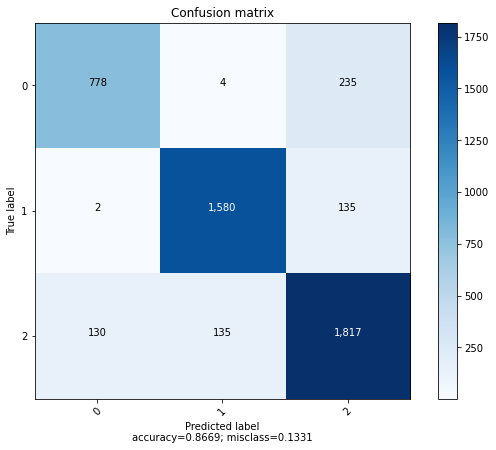

In [34]:
#Extracting target and predicted values as list
mlp_target=mlppred.select(col("label")).collect()
mlp_pred=mlppred.select(col("prediction")).collect()

#Printing precision, recall, and F1-score for Naive Bayes model
mlp_class_report = classification_report(mlp_target,mlp_pred,labels)
print("MLP Classification Report:\n", mlp_class_report)

#Plotting confusion matrix
labels=[0,1,2]
cm = confusion_matrix(mlp_target, mlp_pred, labels)
plot_confusion_matrix(cm,labels,normalize=False)

In [27]:
#Parameters of the model - #From Stackoverflow
print(mlpcvModel.avgMetrics)
{param[0].name: param[1] for param in mlpcvModel.extractParamMap().items()}

[0.8647087763446816, 0.8647087763446816, 0.8636445728297165, 0.8636445728297165, 0.8694222495970608, 0.8694222495970608, 0.869603771703936, 0.869603771703936]


{'estimator': Pipeline_40b02f90c0cb,
 'estimatorParamMaps': [{Param(parent='MultilayerPerceptronClassifier_485ff9d70576', name='blockSize', doc='Block size for stacking input data in matrices. Data is stacked within partitions. If block size is more than remaining data in a partition then it is adjusted to the size of this data. Recommended size is between 10 and 1000, default is 128.'): 256,
   Param(parent='MultilayerPerceptronClassifier_485ff9d70576', name='layers', doc='Sizes of layers from input layer to output layer E.g., Array(780, 100, 10) means 780 inputs, one hidden layer with 100 neurons and output layer of 10 neurons.'): [32,
    32,
    3],
   Param(parent='MultilayerPerceptronClassifier_485ff9d70576', name='solver', doc='The solver algorithm for optimization. Supported options: l-bfgs, gd.'): 'l-bfgs',
   Param(parent='MultilayerPerceptronClassifier_485ff9d70576', name='tol', doc='the convergence tolerance for iterative algorithms (>= 0).'): 1e-07},
  {Param(parent='Multi

####**Other applications on data**

######**Multivariate Linear Regression to model value of players**

In [0]:
#Creating valuation dataset

#List of variables
variables = ['Age','Overall','Potential','value(M)','wage(K)',
'Special','International Reputation','Skill Moves',
'Contract Valid Until','Crossing','Finishing','HeadingAccuracy',
'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
'LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
'Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
'Marking','StandingTackle','Release Clause(M)']

#Creating dataset
df_val = df.select(*(col(c).cast("double").alias(c) for c in variables))
df_val=df_val.na.drop() # For simplicity, records with NA values are dropped
df_val.show()

+----+-------+---------+--------+-------+-------+------------------------+-----------+--------------------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-----------------+
| Age|Overall|Potential|value(M)|wage(K)|Special|International Reputation|Skill Moves|Contract Valid Until|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|Release Clause(M)|
+----+-------+---------+--------+-------+-------+------------------------+-----------+--------------------+--------+---------+---------------+------------+-------+-----

In [0]:
df_val.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Overall: double (nullable = true)
 |-- Potential: double (nullable = true)
 |-- value(M): double (nullable = true)
 |-- wage(K): double (nullable = true)
 |-- Special: double (nullable = true)
 |-- International Reputation: double (nullable = true)
 |-- Skill Moves: double (nullable = true)
 |-- Contract Valid Until: double (nullable = true)
 |-- Crossing: double (nullable = true)
 |-- Finishing: double (nullable = true)
 |-- HeadingAccuracy: double (nullable = true)
 |-- ShortPassing: double (nullable = true)
 |-- Volleys: double (nullable = true)
 |-- Dribbling: double (nullable = true)
 |-- Curve: double (nullable = true)
 |-- FKAccuracy: double (nullable = true)
 |-- LongPassing: double (nullable = true)
 |-- BallControl: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- SprintSpeed: double (nullable = true)
 |-- Agility: double (nullable = true)
 |-- Reactions: double (nullable = true)
 |-- Balance: double (nulla

In [0]:
#Creating correlation matrix
from pyspark.ml.stat import Correlation
#Creating list of columns
df_corr = df_val.columns

#Function to create correlation matrix as spark documentation method was not working.
#Source - Stackoverflow
def correlation_matrix(df, corr_columns, method='pearson'):
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=corr_columns, outputCol=vector_col)
    df_vector = assembler.transform(df).select(vector_col)
    matrix = Correlation.corr(df_vector, vector_col, method)

    result = matrix.collect()[0]["pearson({})".format(vector_col)].values
    return pd.DataFrame(result.reshape(-1, len(corr_columns)), columns=corr_columns, index=corr_columns)

#Creating correlation matrix
corr_mat = correlation_matrix(df_val,df_corr,method='pearson')
corr_mat

,Age,Overall,Potential,value(M),wage(K),Special,International Reputation,Skill Moves,Contract Valid Until,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Release Clause(M)
Age,1.000000,0.327668,-0.432727,0.004363,0.128379,0.084124,0.322023,-0.104517,-0.327476,0.004745,-0.018357,0.081742,-0.013183,0.071957,-0.119620,0.056609,0.126459,0.051021,-0.060823,-0.268996,-0.277016,-0.140492,0.334413,-0.127573,0.059606,0.105418,-0.064309,0.199905,0.045359,0.146731,0.094465,-0.016170,0.071266,0.125908,0.253191,0.045988,0.042457,-0.017868
Overall,0.327668,1.000000,0.602912,0.806685,0.705870,0.346310,0.685120,0.131972,0.179816,0.151277,0.105122,0.132708,0.259790,0.172000,0.123609,0.182878,0.171434,0.262283,0.187647,-0.004442,0.000788,0.045379,0.792130,0.008818,0.174224,0.134706,0.114205,0.167982,0.152201,0.193428,0.182698,0.116471,0.295895,0.149723,0.550990,0.163680,0.146887,0.793742
Potential,-0.432727,0.602912,1.000000,0.672723,0.515242,0.162061,0.405152,0.136827,0.385842,0.057067,0.048263,0.011699,0.182415,0.042295,0.132394,0.056551,-0.000473,0.148649,0.147142,0.127576,0.129244,0.085982,0.410801,0.064391,0.035935,0.019130,0.044934,-0.011344,0.032819,0.013931,0.061028,0.043383,0.172056,-0.002926,0.266432,0.088649,0.071477,0.682491
value(M),0.004363,0.806685,0.672723,1.000000,0.833664,0.324467,0.628540,0.217873,0.252248,0.175732,0.194295,0.106648,0.277780,0.218401,0.209222,0.208258,0.186711,0.241774,0.247122,0.131842,0.130923,0.145602,0.621063,0.099879,0.192177,0.075437,0.150351,0.064734,0.195551,0.098625,0.077183,0.190848,0.305942,0.178625,0.451872,0.081484,0.058075,0.993052
wage(K),0.128379,0.705870,0.515242,0.833664,1.000000,0.293075,0.651888,0.148372,0.155424,0.164114,0.140116,0.128976,0.242890,0.180671,0.164864,0.177063,0.154145,0.217380,0.210296,0.067732,0.072539,0.091740,0.547581,0.067204,0.171489,0.092466,0.112181,0.093444,0.158180,0.133824,0.119964,0.150323,0.247861,0.162217,0.410308,0.114451,0.100716,0.827017
Special,0.084124,0.346310,0.162061,0.324467,0.293075,1.000000,0.267946,0.712079,0.046229,0.847625,0.671336,0.498982,0.885911,0.713540,0.852802,0.825357,0.763025,0.804060,0.883592,0.565485,0.539037,0.614157,0.383159,0.586803,0.806536,0.150278,0.764598,-0.012047,0.809127,0.559500,0.464842,0.784695,0.698207,0.688845,0.665459,0.466926,0.465858,0.316867
International Reputation,0.322023,0.685120,0.405152,0.628540,0.651888,0.267946,1.000000,0.128227,0.021472,0.144397,0.126734,0.114910,0.213086,0.206774,0.127765,0.187350,0.176568,0.205059,0.174572,-0.013145,-0.016757,0.049396,0.549724,0.027571,0.174096,0.098016,0.022077,0.101008,0.154936,0.126767,0.093145,0.130461,0.257386,0.195057,0.441298,0.085448,0.062644,0.608682
Skill Moves,-0.104517,0.131972,0.136827,0.217873,0.148372,0.712079,0.128227,1.000000,0.060825,0.727378,0.747173,0.237232,0.680580,0.720573,0.855183,0.753374,0.657943,0.521245,0.799684,0.652747,0.597302,0.695125,0.164180,0.618356,0.673559,-0.080950,0.506794,-0.272453,0.741377,0.160403,-0.003232,0.792490,0.650341,0.660770,0.485139,0.021840,0.011157,0.214888
Contract Valid Until,-0.327476,0.179816,0.385842,0.252248,0.155424,0.046229,0.021472,0.060825,1.000000,0.012575,0.020962,0.012325,0.066605,-0.004821,0.066398,-0.007430,-0.030664,0.036916,0.063351,0.097409,0.113707,0.044819,0.126446,0.013331,0.008423,-0.014107,0.056570,-0.007054,0.008093,-0.011202,0.008012,0.022764,0.041365,-0.040939,0.061914,0.024237,0.024181,0.262256
Crossing,0.004745,0.151277,0.057067,0.175732,0.164114,0.847625,0.144397,0.727378,0.012575,1.000000,0.619495,0.292097,0.778623,0.640882,0.839448,0.826392,0.723834,0.701921,0.814278,0.618958,0.577785,0.656522,0.194601,0.624333,0.673387,-0.037318,0.616481,-0.240347,0.724456,0.312744,0.278131,0.753206,0.652758,0.603088,0.486659,0.287157,0.289360,0.172555


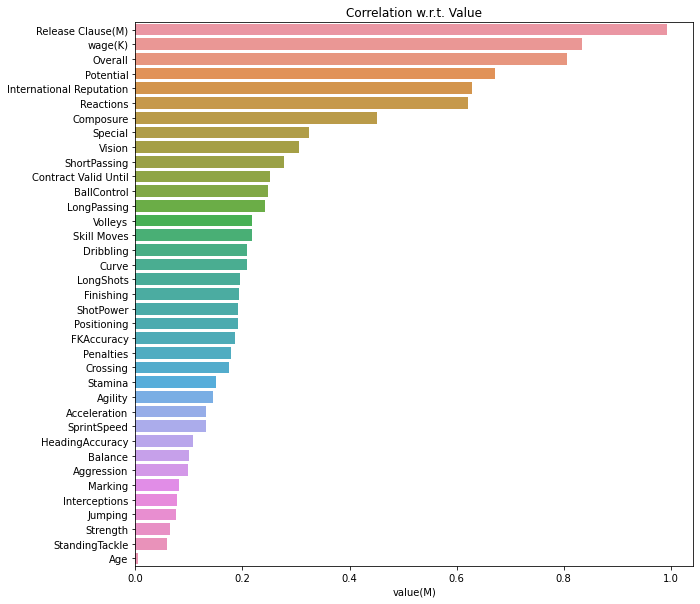

In [0]:
#Extracting correlation with value
corr_value = corr_mat['value(M)'].sort_values(ascending = False)
corr_value = corr_value.iloc[1:]

#Plotting correlation w.r.t. value
plt.figure(figsize=(10,10))
sns.barplot(y=corr_value.index,x=corr_value, orient='h')
plt.title("Correlation w.r.t. Value");

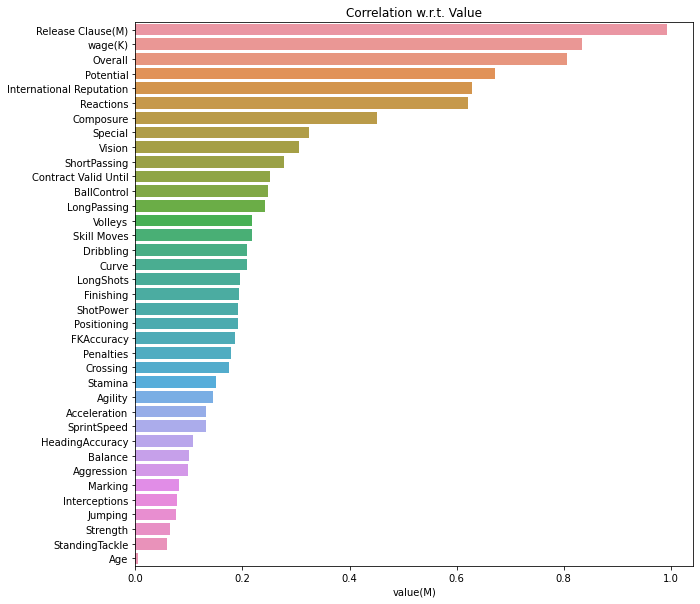

In [0]:
#Plotting correlation w.r.t. value
plt.figure(figsize=(10,10))
sns.barplot(y=corr_value.index,x=corr_value, orient='h')
plt.title("Correlation w.r.t. Value");

In [0]:
#Defining regression variables - Dropping Age and value from the list
reg_variables = ['Release Clause(M)','wage(K)','Overall','Potential',
'International Reputation','Reactions','Composure','Special',
'Vision','ShortPassing','Contract Valid Until']

#Vectorizing features
vecAssembler_reg = VectorAssembler(inputCols=reg_variables, outputCol="features")
df_reg = vecAssembler_reg.transform(df_val).select('value(M)','features')
df_reg.show(3)

+--------+--------------------+
|value(M)|            features|
+--------+--------------------+
|   110.5|[226.5,565.0,94.0...|
|    77.0|[127.1,405.0,94.0...|
|   118.5|[228.1,290.0,92.0...|
+--------+--------------------+
only showing top 3 rows



In [0]:
#Splitting data
train_reg, test_reg = df_reg.randomSplit([0.7, 0.3], seed=123)

#Model init
lin_reg = LinearRegression(featuresCol = 'features', labelCol='value(M)')

#Fitting model on training data
lin_reg_model = lin_reg.fit(train_reg)

#Fitting model on test data
reg_pred = lin_reg_model.transform(test_reg)

reg_pred.show()

+--------+--------------------+-------------------+
|value(M)|            features|         prediction|
+--------+--------------------+-------------------+
|     1.0|[1.3,2.0,67.0,71....| 0.6460813768438873|
|     1.0|[1.3,2.0,68.0,73....| 0.6020254375223448|
|     1.0|[1.3,3.0,67.0,71....| 0.5989393047204095|
|     1.0|[1.3,3.0,69.0,74....| 0.7172020322286414|
|     1.0|[1.3,4.0,69.0,69....| 0.8426167278973988|
|     1.0|[1.4,1.0,67.0,72....|  0.665026203915958|
|     1.0|[1.4,1.0,69.0,69....| 0.8731834122810271|
|     1.0|[1.4,1.0,69.0,69....| 0.8675832538125601|
|     1.0|[1.4,2.0,68.0,73....| 0.6993942657031518|
|     1.0|[1.4,3.0,68.0,69....|  0.773308685657689|
|     1.0|[1.4,3.0,69.0,69....| 0.7880637698112132|
|     1.0|[1.4,4.0,70.0,70....| 0.9681942372937486|
|     1.0|[1.4,5.0,69.0,71....| 0.8633043717032978|
|     1.0|[1.5,2.0,66.0,75....| 0.5876343736911762|
|     1.0|[1.5,2.0,67.0,73....| 0.6965203970397758|
|     1.0|[1.5,2.0,69.0,71....| 0.7283971371226379|
|     1.0|[1

In [0]:
#Evaluating model
evaluator = RegressionEvaluator(
    labelCol="value(M)", predictionCol="prediction", metricName="r2")

#RMSE and Adj R square
trainingSummary = lin_reg_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("Adj r2: %f" % trainingSummary.r2adj)

In [0]:
#Coefficients of the model
print("Coefficients: " + str(lin_reg_model.coefficients))
print("Intercept: " + str(lin_reg_model.intercept))

Coefficients: [0.47506828570044596,0.00522096661642189,0.07563728388527699,-0.011696463177047697,0.27287465521455784,0.002358379751810523,-0.0012041926151754579,0.00014444497101117807,0.004264586331048587,-0.0022328136764003634,-0.0035296239449878804]
Intercept: 2.170502501943239


In [0]:
#Parameters of the model - #From Stackoverflow
{param[0].name: param[1] for param in lin_reg_model.extractParamMap().items()}

{'aggregationDepth': 2,
 'elasticNetParam': 0.0,
 'epsilon': 1.35,
 'featuresCol': 'features',
 'fitIntercept': True,
 'labelCol': 'value(M)',
 'loss': 'squaredError',
 'maxIter': 100,
 'predictionCol': 'prediction',
 'regParam': 0.0,
 'solver': 'auto',
 'standardization': True,
 'tol': 1e-06}

**Considering models value is accurate than the market value, residuals is considered as undervalued if residual (Diff_val) is negative and overvalued if reisudal is positive.**

In [0]:
#Add residual column to data
df_val=df_val.withColumn("Valuation",2.171+0.475*F.col("Release Clause(M)")+0.005*F.col("wage(K)")+0.076*F.col("Overall")-0.012*F.col("Potential")+0.273*F.col("International Reputation")+0.002*F.col("Reactions")-0.001*F.col("Composure")+0.0001*F.col("Special")+0.004*F.col("Vision")-0.002*F.col("ShortPassing")-0.004*F.col("Contract Valid Until"))
df_val=df_val.withColumn("Valuation",df_val["Valuation"].cast(DoubleType()))
df_val=df_val.withColumn("Diff_val",F.col("value(M)")-F.col("Valuation"))
df_val=df_val.withColumn("Diff_val",df_val["Diff_val"].cast(DoubleType()))
df_val.show(3)

+----+-------+---------+--------+-------+-------+------------------------+-----------+--------------------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-----------------+-----------------+-------------------+
| Age|Overall|Potential|value(M)|wage(K)|Special|International Reputation|Skill Moves|Contract Valid Until|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|Release Clause(M)|        Valuation|           Diff_val|
+----+-------+---------+--------+-------+-------+------------------------+-----------+------

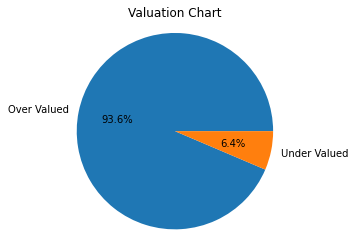

In [0]:
#Counting undervalued and overvalued players
over_valued = df_val.where(df_val.Diff_val>0).count()
under_valued = df_val.where(df_val.Diff_val<0).count()

#Plotting valuation
labels = ['Over Valued','Under Valued']
plt.pie([over_valued,under_valued], labels=labels,autopct='%1.1f%%')
plt.title("Valuation Chart")
plt.axis('equal')
plt.show();

######**Exploratory Data Analysis**

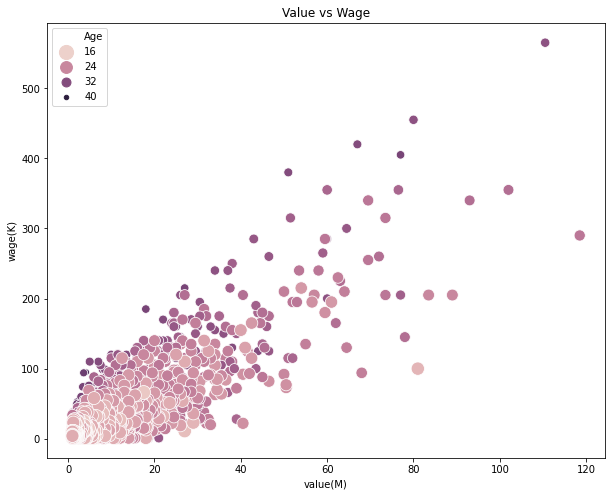

In [0]:
#Plotting Value vs Wage 
df_val1 = df_val.toPandas()
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_val1['value(M)'], y=df_val1['wage(K)'], hue=df_val1['Age'],size =df_val1['Age'],sizes=(200, 20));
plt.title("Value vs Wage")
plt.show();

**Score of individual characteristics like FK Accuracy, Dribbling etc. are highly co-related. But all these numbers are summarised in Skill Moves rating.**

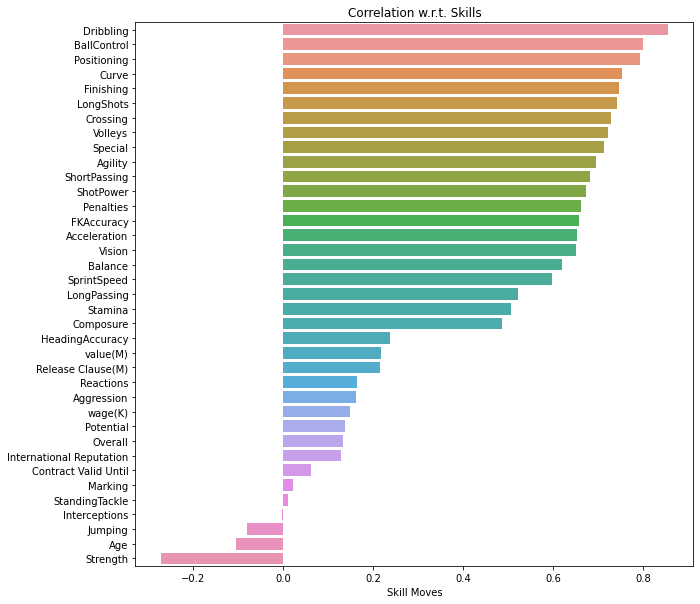

In [0]:
#Extracting correlation with Skill moves rating
corr_skills = corr_mat['Skill Moves'].sort_values(ascending = False)
corr_skills = corr_skills.iloc[1:]

#Plotting correlation w.r.t. value
plt.figure(figsize=(10,10))
sns.barplot(y=corr_skills.index,x=corr_skills, orient='h')
plt.title("Correlation w.r.t. Skills");

In [0]:
from pyspark.sql.functions import count, avg
#Creating skill level wise skills rating summary
#List of skills
cols = ['Dribbling','BallControl','Positioning','Curve','Finishing','LongShots','Crossing','Volleys','Special',
'Agility','ShortPassing','ShotPower','Penalties','FKAccuracy','Acceleration','Vision', 'Balance','SprintSpeed','LongPassing','Stamina','Composure']

#Creating a 
skill_rating_summary = df_val.groupBy('Skill Moves').agg(*[avg(c) for c in cols]).sort('Skill Moves')
skill_rating_summary=skill_rating_summary.withColumnRenamed("Skill Moves","Skill_Moves")
skill_rating_summary=skill_rating_summary.toPandas()
skill_rating_summary

,Skill_Moves,avg(Dribbling),avg(BallControl),avg(Positioning),avg(Curve),avg(Finishing),avg(LongShots),avg(Crossing),avg(Volleys),avg(Special),avg(Agility),avg(ShortPassing),avg(ShotPower),avg(Penalties),avg(FKAccuracy),avg(Acceleration),avg(Vision),avg(Balance),avg(SprintSpeed),avg(LongPassing),avg(Stamina),avg(Composure)
0,1.0,15.291759,22.227171,12.648107,15.721604,13.075724,13.951002,14.837416,13.810690,1171.080178,46.229399,30.102450,23.645880,21.832962,14.959911,44.311804,44.819599,44.861915,44.552339,28.890869,33.552339,52.786192
1,2.0,53.798159,62.608153,45.303748,44.480605,39.845496,45.023011,48.598948,39.460881,1696.301775,57.827087,65.534517,59.133465,47.756739,41.364892,60.254438,50.510191,57.209073,62.673899,60.201183,69.851414,65.771203
2,3.0,70.871720,71.829446,66.271429,62.053061,60.814577,63.084548,63.852187,56.847813,1841.309621,72.856268,69.936735,68.974344,59.143732,55.527114,73.222741,65.262099,70.611662,72.900000,63.143149,72.892711,67.465598
3,4.0,79.045273,78.430093,73.034621,72.075899,69.407457,70.644474,70.616511,65.838881,1931.202397,80.165113,74.733688,73.792277,65.906791,65.086551,78.988016,73.509987,76.589880,77.126498,67.383489,72.684421,74.154461
4,5.0,84.782609,83.326087,76.130435,78.891304,72.065217,74.500000,74.891304,71.847826,1988.282609,86.652174,77.413043,77.173913,70.043478,70.717391,83.347826,77.891304,80.673913,81.000000,70.000000,74.086957,79.108696


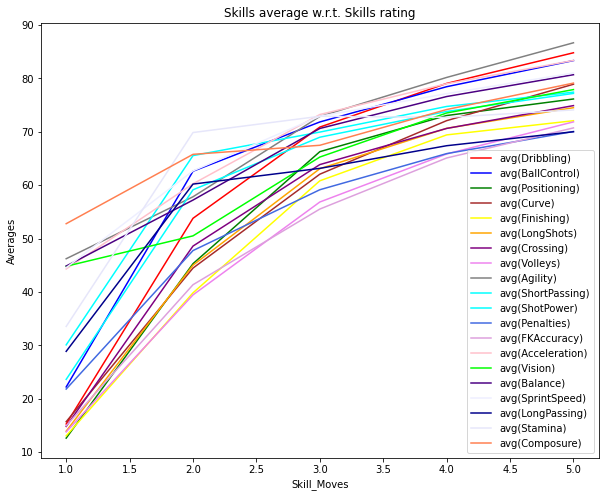

In [0]:
#Plotting skills w.r.t. skills rating
plt.figure(figsize=(10,8))
ax = plt.gca()
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Dribbling)',color='red',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(BallControl)',color='blue',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Positioning)',color='green',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Curve)',color='brown',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Finishing)',color='yellow',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(LongShots)',color='orange',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Crossing)',color='purple',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Volleys)',color='violet',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Agility)',color='gray',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(ShortPassing)',color='cyan',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(ShotPower)',color='aqua',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Penalties)',color='royalblue',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(FKAccuracy)',color='plum',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Acceleration)',color='pink',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Vision)',color='lime',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Balance)',color='indigo',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(SprintSpeed)',color='#eeefff',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(LongPassing)',color='darkblue',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Stamina)',color='lavender',ax=ax)
skill_rating_summary.plot(kind='line',x='Skill_Moves',y='avg(Composure)',color='coral',ax=ax)
plt.ylabel("Averages")
plt.title("Skills average w.r.t. Skills rating")
plt.show()